In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("gustavomodelli/forest-fires-in-brazil")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/forest-fires-in-brazil
['amazon.csv']


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/gustavomodelli/forest-fires-in-brazil/versions/1/amazon.csv', encoding='latin1',parse_dates=['date'])

1. Display Top 5 Rows of The Dataset
2. Check Last 5 Rows

In [ ]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
df.shape

(6454, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [ ]:
df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Janeiro,NaN,NaN
freq,NaN,717,541,NaN,NaN
mean,2007.461729,NaN,NaN,108.293163,2007-06-18 18:28:53.622559488
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2002.000000,NaN,NaN,3.000000,2002-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.000000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,113.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


Check For Duplicate Data and Drop Them

In [ ]:
df.duplicated().sum()

np.int64(32)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

Check Null Values In The Dataset

In [ ]:
df.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


 Get Overall Statistics About The Dataframe

In [ ]:
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


Rename Month Names To English

In [ ]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
df['month'] = df['month'].map({'Janeiro':'January','Fevereiro': 'February','Marco':'March','Abril':'April','Maio':'May','Junho':'June','Julho':'July','Agosto':'August','Setembro':'September','Outubro':'October','Novembro':'November','Dezembro':'December'})

In [ ]:
df

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


Total Number of Fires Registered

In [ ]:
df['number'].count()

np.int64(6422)

In Which Month Maximum Number of Forest Fires Were Reported?

In [ ]:
df.groupby('month')['number'].sum().sort_values(ascending=False)

,number
month,
July,92319.113
October,88681.579
August,88050.435
November,85508.054
September,58578.305
December,57535.480
June,55997.675
January,47681.844
May,34725.363


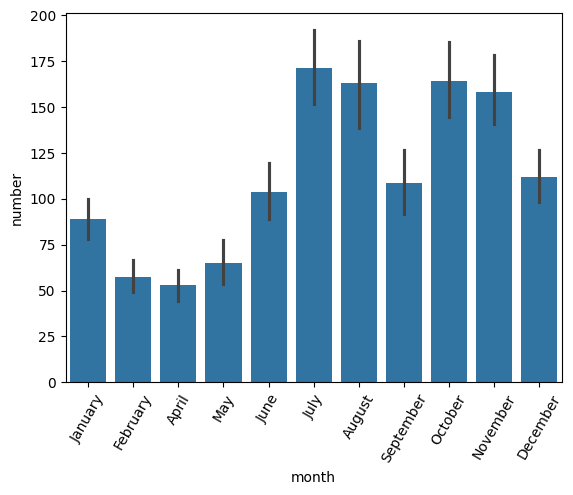

In [ ]:
sns.barplot(x='month',y='number',data=df) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

 In Which Year Maximum Number of Forest Fires Was Reported?

In [ ]:
df.groupby('year')['number'].sum().sort_values(ascending=False)

,number
year,
2003,42760.674
2016,42212.229
2015,41208.292
2012,40084.860
2014,39621.183
2009,39116.178
2004,38450.163
2002,37390.600
2010,37037.449


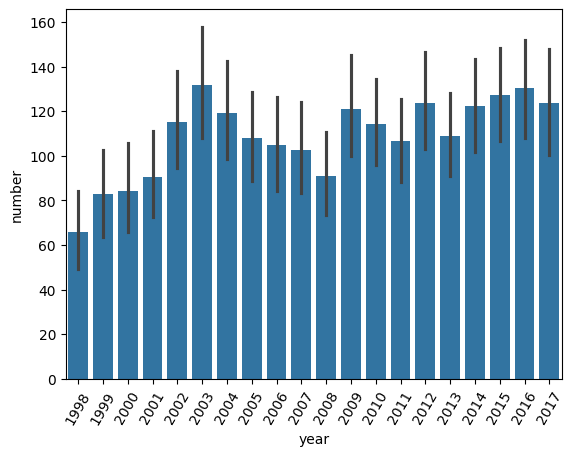

In [ ]:
sns.barplot(x='year',y='number',data=df) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

In Which State Maximum Number of Forest Fires Was Reported?

In [ ]:
df.groupby('state')['number'].sum().sort_values(ascending=False)

,number
state,
Mato Grosso,96246.028
Paraiba,52426.918
Sao Paulo,51121.198
Rio,45094.865
Bahia,44746.226
Piau,37803.747
Goias,37695.520
Minas Gerais,37475.258
Tocantins,33707.885


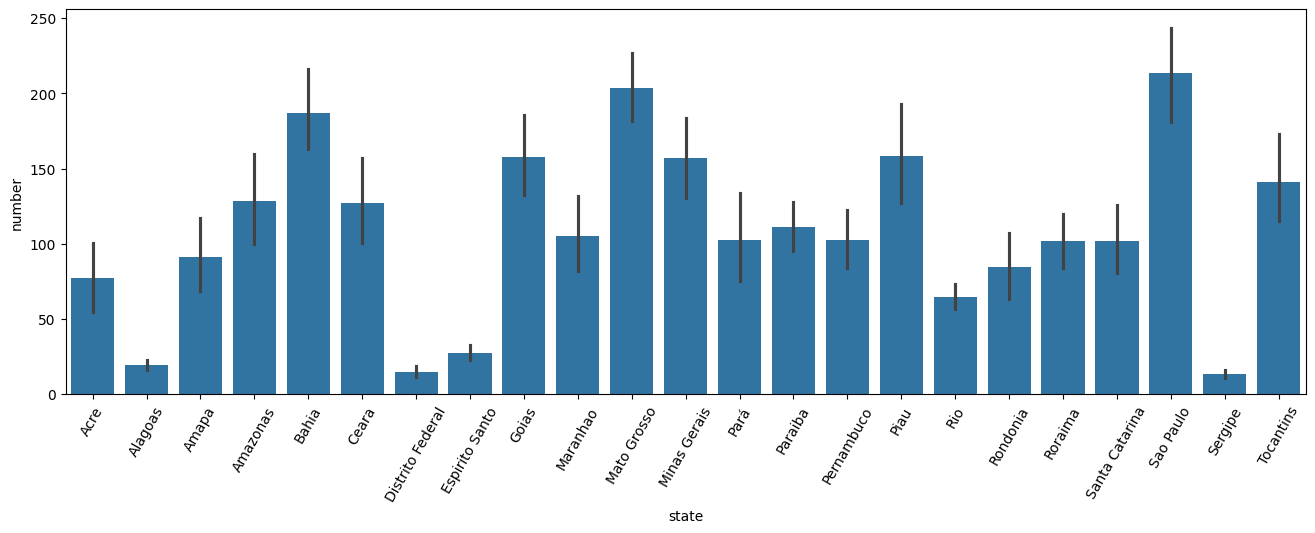

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=df) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

Find Total Number of Fires Were Reported In Amazonas

In [ ]:
df[df['state']=='Amazonas']['number'].sum()

np.float64(30650.129)

Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [ ]:
dataN = df[df['state'] == 'Amazonas']


In [ ]:
dataN

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01
720,2000,Amazonas,January,7.0,2000-01-01
721,2001,Amazonas,January,3.0,2001-01-01
722,2002,Amazonas,January,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,December,80.0,2012-01-01
953,2013,Amazonas,December,236.0,2013-01-01
954,2014,Amazonas,December,293.0,2014-01-01
955,2015,Amazonas,December,565.0,2015-01-01


In [ ]:
dataN.groupby('year')['number'].sum().sort_values(ascending=False)

,number
year,
2002,2852.000
2008,2717.000
2014,2385.909
2010,2324.508
2004,2298.207
2016,2060.972
2005,1657.128
2011,1652.538
2003,1524.268


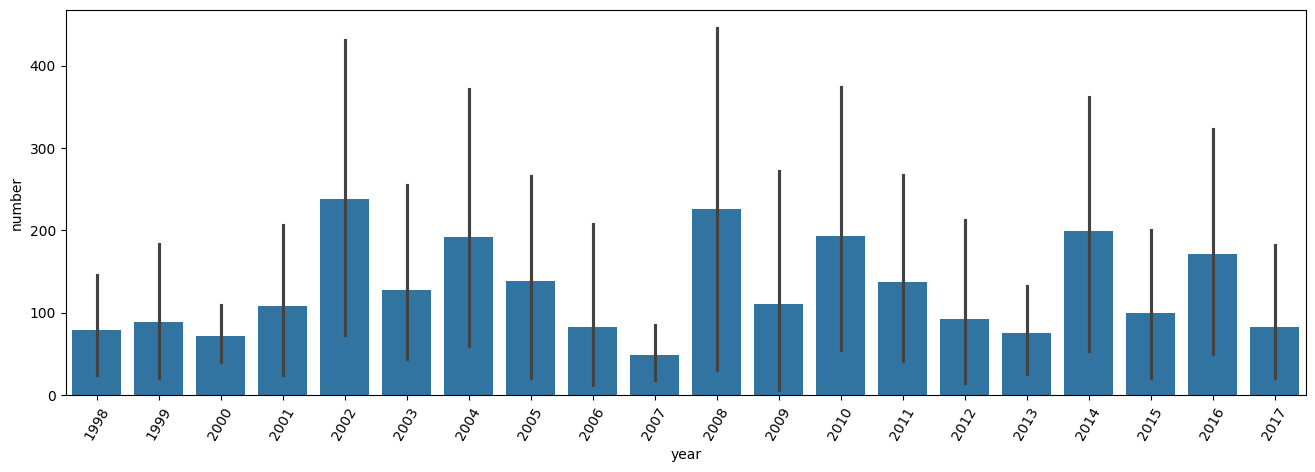

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=dataN) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [ ]:
dataN.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
dataN['date'] = pd.to_datetime(dataN['date'])
day = dataN.groupby(dataN['date'].dt.dayofweek).sum(numeric_only=True).number
display(day)

/tmp/ipython-input-4099255685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataN['date'] = pd.to_datetime(dataN['date'])


,number
date,
0,1886.601
1,6474.217
2,3910.177
3,5754.802
4,5446.480
5,4162.666
6,3015.186


In [ ]:
import calendar
day.index = [calendar.day_name[i] for i in range(0,7)]
day = day.reset_index()

In [ ]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


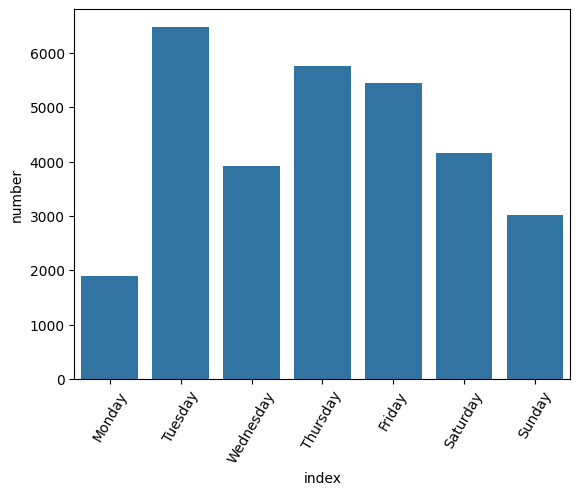

In [ ]:
sns.barplot(x='index',y='number',data=day) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

In [ ]:
dataN.groupby('date')['number'].sum().sort_values(ascending=False)

,number
date,
2002-01-01,2852.000
2008-01-01,2717.000
2014-01-01,2385.909
2010-01-01,2324.508
2004-01-01,2298.207
2016-01-01,2060.972
2005-01-01,1657.128
2011-01-01,1652.538
2003-01-01,1524.268


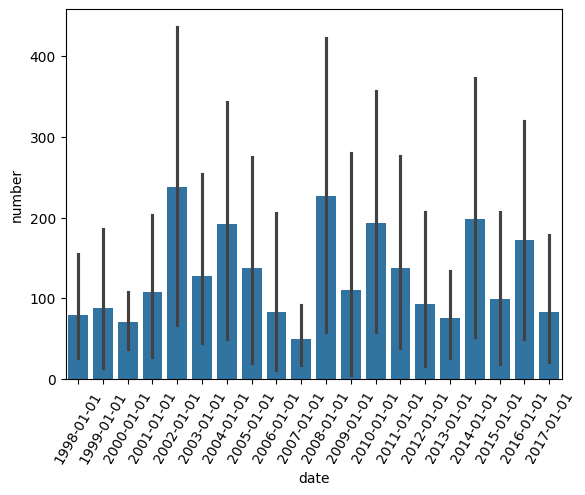

In [ ]:
sns.barplot(x='date',y='number',data=dataN) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

 Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [ ]:
df[df['year']==2015].groupby('month')['number'].sum().reset_index()

,month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,May,2384.000
8,November,4034.518
9,October,4499.525


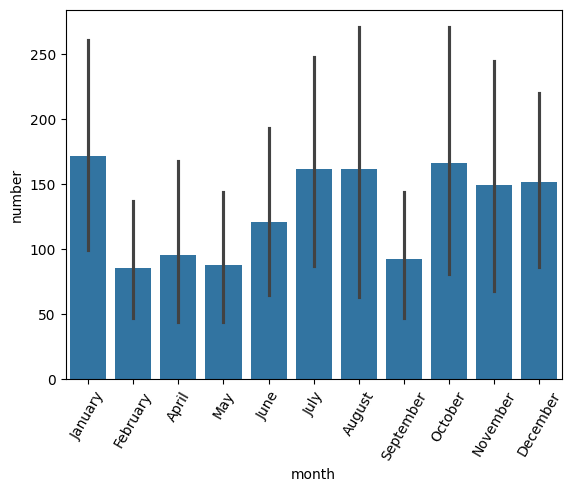

In [ ]:
sns.barplot(x='month',y='number',data=dfy) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

In [ ]:
dfy = df[df['year']==2015]

In [ ]:
dfy.groupby('year')['number'].sum()

,number
year,
2015,41208.292


Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [ ]:
dd =df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [ ]:
dd

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


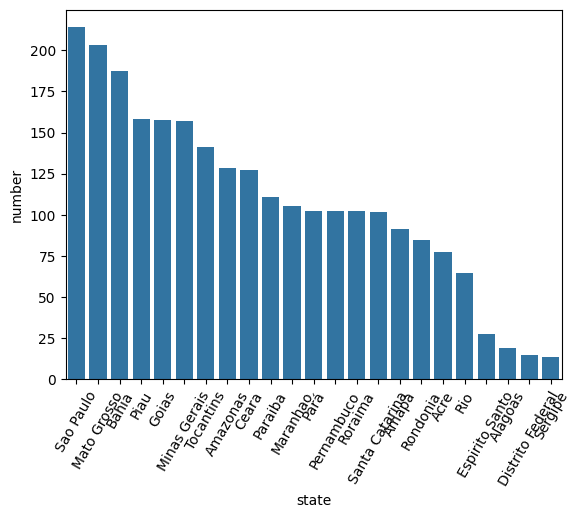

In [ ]:
sns.barplot(x='state',y='number',data=dd) #palette='rocket'
plt.xticks(rotation=60)
plt.show()

18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [ ]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
df[df['month'] == 'December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)